# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.head())
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2,100,340]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices]).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,11594,7779,12144,3252,8035,3029
2,381,4025,9670,388,7271,1371


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 1) The first customer seems to be a delicatessen establishment. It's 'Delicatessen' purchase is approximately 4 times standard deviation more than the mean of the purchases of Delicatessen. 2) The second customer is a laundry shop. It's Detergent paper purchasing is very high with respect to the mean of the dataset. 3) The third customer is a grocery shop. (Very high than mean)

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Milk'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data , data['Milk'], test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
y_pred = regressor.predict(X_test)
score= regressor.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score= r2_score(y_test, y_pred)
print("Score = {}" .format(score))
print("r2_Score = {}" .format(r2_score))



Score = 0.21225064603743746
r2_Score = 0.21225064603743748


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** <br>
1) I have attempted to predict the 'Milk' feature<br>
2) The reported score is 0.17404<br>
3) The feature is a necesary as we are not able to predict it perfectly well using the other features in our dataset. Therefore, it is an important feature. (Only able to capture about 17% of total variance)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

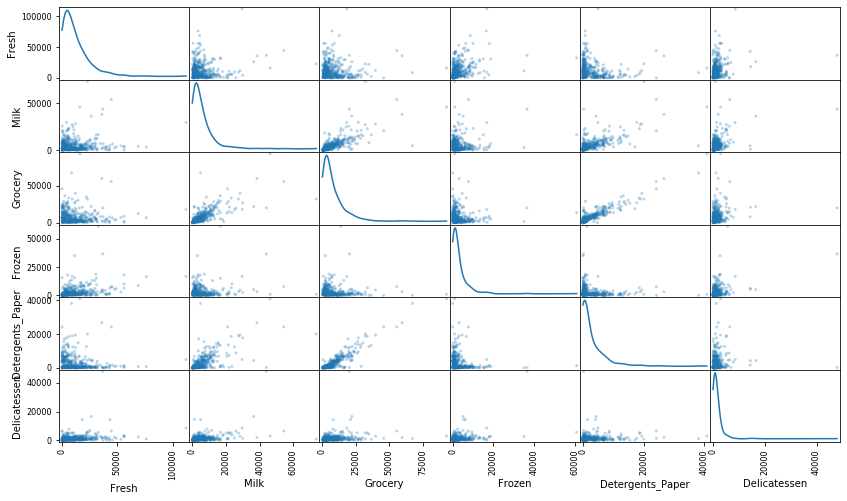

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [6]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [7]:
import seaborn as sns

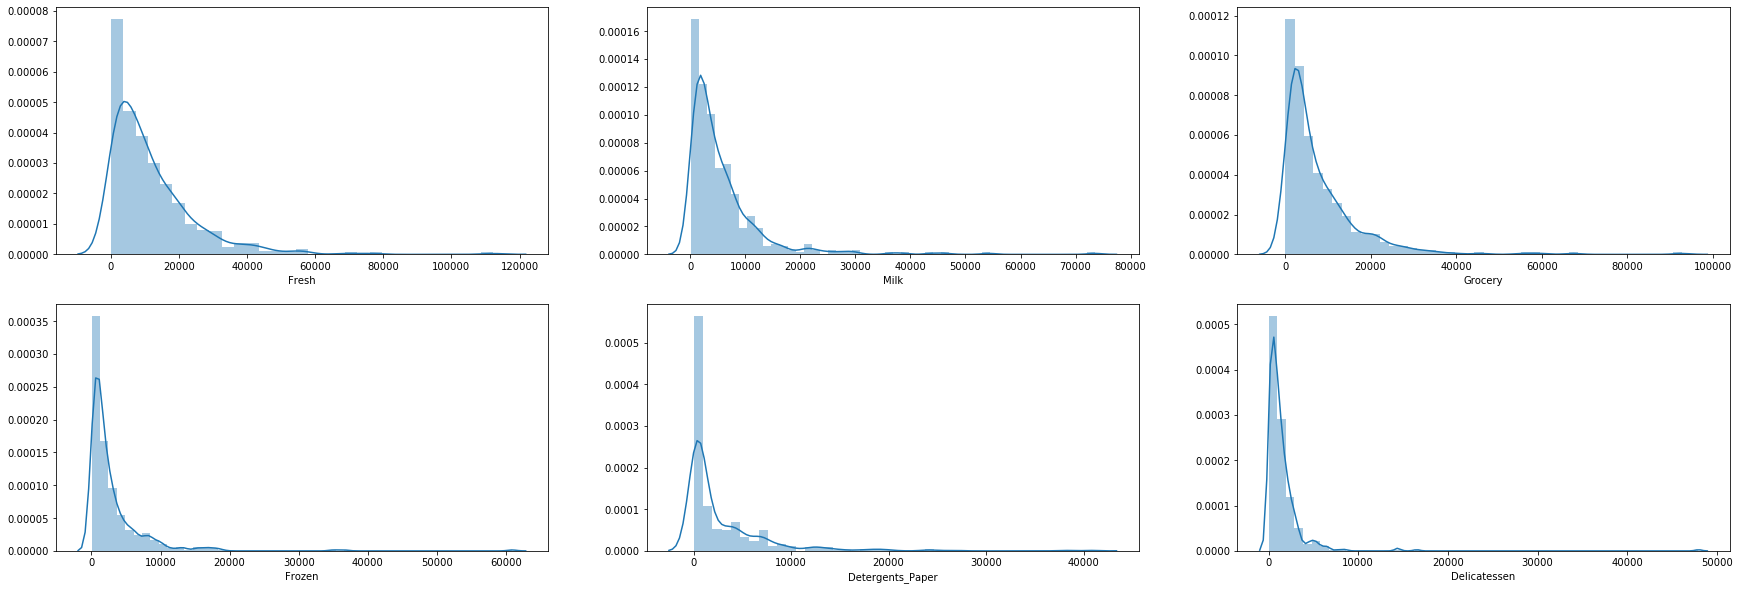

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
#ax = fig.add_subplot(2,3)

for i,column in enumerate(data.columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.distplot(data[column])

In [9]:
for i,column in enumerate(data.columns):
    print('The mean',column,data[column].mean())
    print('The std',column,data[column].std())
    print('The median',column,data[column].median())
    print("---------------------------------------------")

The mean Fresh 12000.297727272728
The std Fresh 12647.328865076892
The median Fresh 8504.0
---------------------------------------------
The mean Milk 5796.265909090909
The std Milk 7380.377174570841
The median Milk 3627.0
---------------------------------------------
The mean Grocery 7951.277272727273
The std Grocery 9503.162828994344
The median Grocery 4755.5
---------------------------------------------
The mean Frozen 3071.931818181818
The std Frozen 4854.673332592366
The median Frozen 1526.0
---------------------------------------------
The mean Detergents_Paper 2881.4931818181817
The std Detergents_Paper 4767.854447904201
The median Detergents_Paper 816.5
---------------------------------------------
The mean Delicatessen 1524.8704545454545
The std Delicatessen 2820.105937369397
The median Delicatessen 965.5
---------------------------------------------


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** <br>
1) All the distributions are normal,with highly right skew. The points which are very far away from the median are mostly outliers. The distribution has a median towards zero<br>
2) Milk and Grocery (0.72) ; Milk and Detergents paper (0.66) ; Grocery and Detergents (highly correlated) (0.92) <br>
3) This denies my suspicions. The milk has come to be midly correlated with Detergents and Grocery. However, Grocery and Detergents are very highly correlated. Chances are Grocery/Detergents (any one of them) could be able to be predicted with much better score.<br>
4) All the distributions are approximately normal with right skew and median about zero.<br>


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

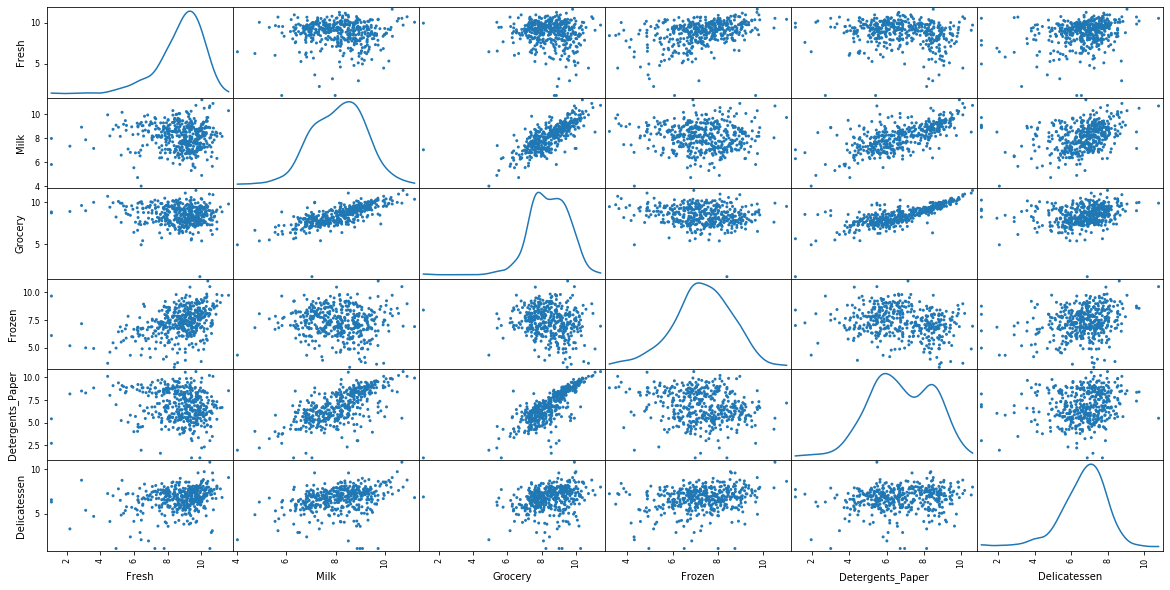

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.99, figsize = (20,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


In [12]:
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


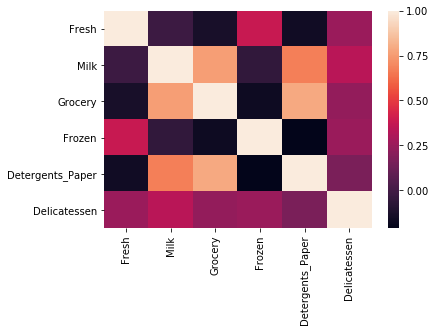

In [13]:
sns.heatmap(log_data.corr())

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
# For each feature find the data points with extreme high or low values
indexes = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("\nData points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    indexes.extend(list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index))
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(set(indexes))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918



Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen



Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437



Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215



Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918



Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [15]:
data.index


RangeIndex(start=0, stop=440, step=1)

In [16]:
good_data.index

RangeIndex(start=0, stop=413, step=1)

In [17]:
from collections import Counter
Counter(indexes)

Counter({66: 2,
         95: 1,
         96: 1,
         218: 1,
         338: 2,
         75: 2,
         38: 1,
         65: 1,
         420: 1,
         122: 1,
         142: 2,
         154: 2,
         161: 1,
         177: 1,
         204: 1,
         237: 1,
         289: 2,
         356: 1,
         402: 1,
         109: 1,
         128: 1,
         137: 1,
         184: 1,
         187: 1,
         203: 1,
         233: 1,
         285: 1})

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**<br>
1) Yes. We can see that 338, 66, 289, 142, 154, 75 is repeated twice in features<br>
2) Total data points removed: 42. The data points should be removed from the dataset when we are applying some algorithm to the dataset. Ex. ML algorithms like Linear Regression, PCA and KMeans are affected by the presence of outliers as instead of focusing on the main dataset, they give more than required importance to the outliers data. This can distort our results. The performance of algorithm is what drives us to remove outlers. (The same reason why we also rescale our data)<br>
3) However, if we are exploring the data, these outliers shouldn't be removed. Because, they can give us some meaningful insights.<br>

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)



In [19]:
pd.DataFrame(pca_samples)

,0,1,2,3,4,5
0,1.785943,-1.457248,0.774292,1.113562,-0.592792,0.390587
1,2.262318,-1.618954,0.193234,-0.155541,-0.651081,0.142483
2,2.636877,2.295019,1.247551,0.654160,-0.906439,0.009364


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4694,-0.1602,0.4135,0.4538,-0.1840,0.7368,0.1440
Dimension 2,0.2643,-0.6298,-0.1890,-0.1080,-0.5867,-0.0210,-0.4597
Dimension 3,0.1068,-0.7511,0.0767,-0.0220,0.6067,-0.0867,0.2323
Dimension 4,0.0969,-0.1143,0.1208,-0.0098,-0.5026,-0.3621,0.7671
Dimension 5,0.0417,0.0136,0.7602,0.2265,-0.0066,-0.4958,-0.3532
Dimension 6,0.0208,0.0188,0.4415,-0.8547,-0.0352,0.2689,0.0262


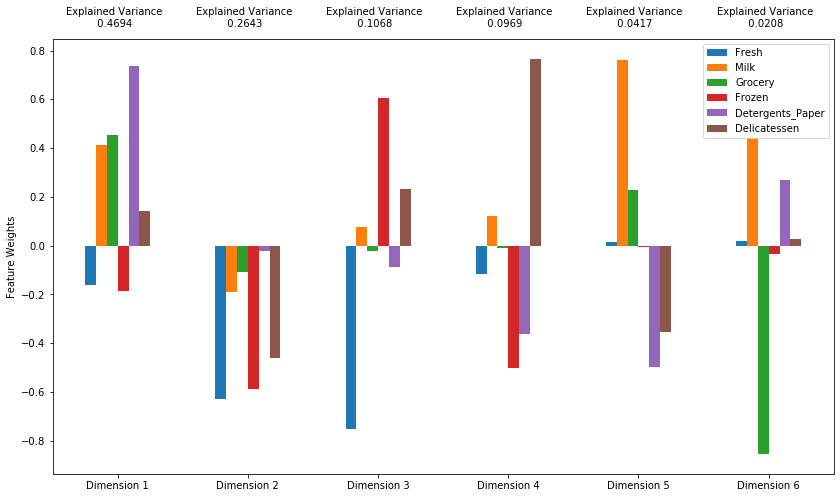

In [20]:
# Generate PCA results plot

pca_results = vs.pca_results(good_data, pca)
pca_results

In [21]:
pca.explained_variance_ratio_

array([0.4694499 , 0.26431247, 0.10676028, 0.09694678, 0.04168644,
       0.02084413])

In [22]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.7337623702825589

### Question 5

* How much variance in the data is explained **in total** by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** <br>
1) Total variance of 0.734 is explained by the first and second principal component.<br>
2) Variance of 0.4694499 ,0.26431247 ,0.10676028,0.09694678  is explained by the first 4 principal components.<br>

**Dimension 1:** Variance explained = 0.469 (Highest of all). Significant positive weight placed for Detergents_Paper(0.74) and mild positive weights for Milk and Grocery (>0.4). Negative weights to Fresh and Frozen given.<br>
**Dimension 2:** Variance explained = 0.264. Considerable negative weights given to Fresh, Frozen and Delicatessen. A very small negative weight given to Detergents Paper.<br>
**Dimension 3:** Variance explained = 0.106. Very high negative weight (-0.7)given to Fresh and a mild negative weight given to Detergents Paper. Milk, Frozen and Delicatessen given mild positive weights.<br>
**Dimension 4:** A very high negative weight given to Frozen (~-0.7) and a mild negative weight given to Detergents paper. Delicatessen given some mild positive weight.<br>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7859,-1.4572,0.7743,1.1136,-0.5928,0.3906
1,2.2623,-1.6190,0.1932,-0.1555,-0.6511,0.1425
2,2.6369,2.2950,1.2476,0.6542,-0.9064,0.0094


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2 )
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data

,Dimension 1,Dimension 2
0,1.694805,0.330548
1,1.708194,-0.700690
2,1.785943,-1.457248
3,-1.249394,-1.333055
4,0.699362,-2.238972
5,1.010504,-0.105803
6,1.048801,0.511247
7,1.476879,-0.752543
8,0.785937,0.883596
9,2.793429,-0.543662


In [25]:
pca.explained_variance_ratio_

array([0.4694499 , 0.26431247])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [26]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7859,-1.4572
1,2.2623,-1.6190
2,2.6369,2.2950


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

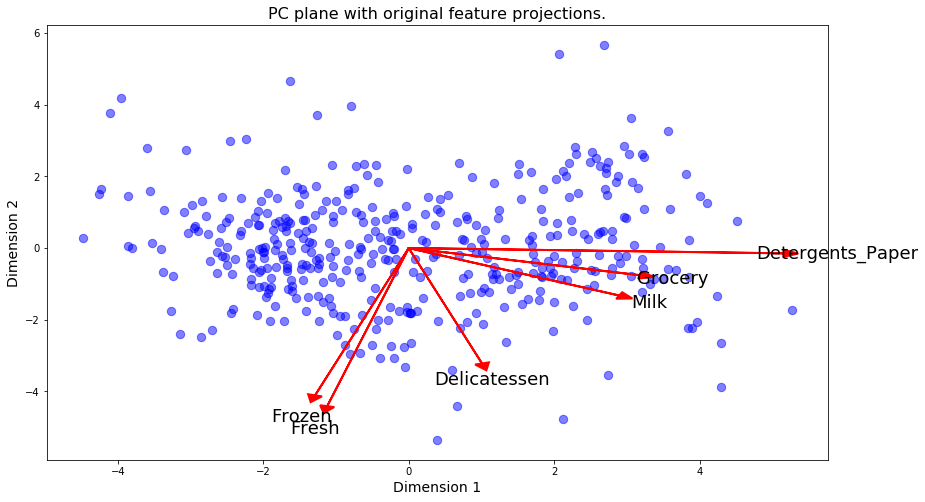

In [27]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** <br>Milk, Grocery and Detergents are highly correlated with the Component 1.<br>
Frozen and Fresh highly correlated with Component 2.<br>
Yes, these observations agree with the pca_results plots above.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** <br>
In general, the advantange of Gaussian Mixture Models (GMMs) over k-means is that GMMs deliver a soft-assignment of clusters. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point. Also, one disadvantage that KMeans has is, that it highly depends on the initial placement of cluster centers. Therefore, aren't a robust clustring algorithm in many cases.<br>
K-means assigns data poins to the closest cluster in terms of Euclidian distance. Thus, it treats distances in all directions equally. The advantage of k-means comapred to GMMs is that it is much faster. For GMMs, many parameters must be fitted to the data (quadratic in the number of features) while k-means only maintains cluster centers (linear in number of features). Therefore k-means will be much quicker to train.<br><br>
Given the dataset, **I would like to use GMM as our data is not that huge (so training time wouldn't be too large) and it can also provide us soft clustering.**



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [28]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
for n_clusters in np.arange(2,15,1):
    clusterer = GaussianMixture(n_components = n_clusters)
    clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)

    print('Score for {} clusters is {}'.format(n_clusters,score))
    #print("centers : {}".format(centers))

Score for 2 clusters is 0.44088261609731283
Score for 3 clusters is 0.3781648310644399
Score for 4 clusters is 0.2655395659921998
Score for 5 clusters is 0.3037335871562397
Score for 6 clusters is 0.33617934136149624
Score for 7 clusters is 0.33764750068478605
Score for 8 clusters is 0.27390930628349636
Score for 9 clusters is 0.3467676851625547
Score for 10 clusters is 0.2837405299266651
Score for 11 clusters is 0.30264189268059655
Score for 12 clusters is 0.30364616550190915
Score for 13 clusters is 0.31758435638917376
Score for 14 clusters is 0.32011171552166257


In [29]:
clusterer = GaussianMixture(n_components = 2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.fit(pca_samples)
centers = clusterer.means_
score = silhouette_score(reduced_data,preds)



### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** <br>
Above are printed silhotte scores for n_clusters from 2 to 15. Based on that, we see that **we get a highest silhoutte score for 2 clusters. (A score of 0.4402)**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

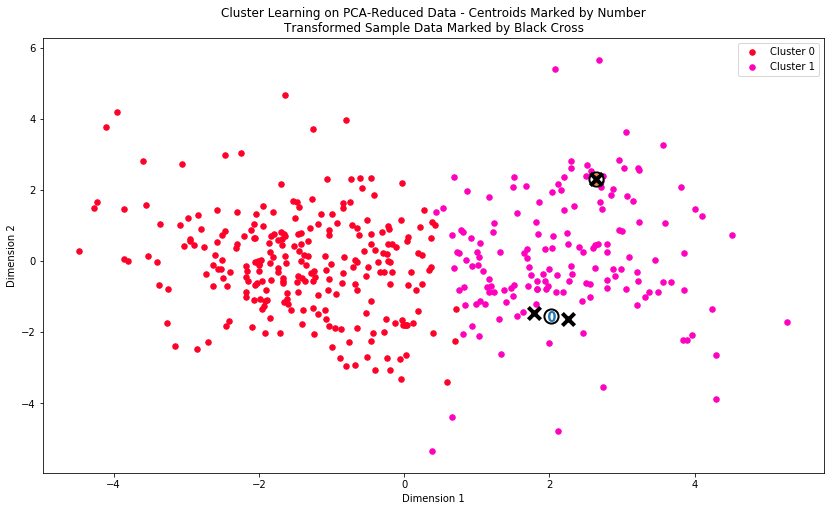

In [30]:
# Display the results of the clustering from implementation

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,13082.0,10737.0,14182.0,2667.0,4508.0,2405.0
Segment 1,1061.0,6704.0,12381.0,251.0,6534.0,451.0


In [32]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**<br>
**Segment 0:** customers have below average spending on almost all of the items. However, the spending on Detergents Paper and Frozen are very low compared to the average spending. The spending on milk is also almost half of average spending.<br>


**Segment 1:** customers have average spending more around (slightly more) than the average spendings of all features. However, the spending on Detergents paper is almost 1.5 times the mean. The spending on Milk and Frozen is less than half of average spending of the customers!

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
#for i, pred in enumerate(sample_preds):
   # print("Sample point", i, "predicted to be in Cluster", pred)

In [34]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,11594,7779,12144,3252,8035,3029
2,381,4025,9670,388,7271,1371


**Answer:**<br>
Sample point 0 predicted to be in Cluster 1 <br>
Sample point 1 predicted to be in Cluster 1 <br>
Sample point 2 predicted to be in Cluster 1 <br>
<br>
Looking at the samples data, it seems to be almost consistent. Some of the results are too low or too high that expected but considering all features, the prediction on samples is correct.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

In [35]:
segment0_customers = data.loc[preds==0]
segment1_customers = data.loc[preds==1]



In [36]:
segment0_customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
11,13146,1124,4523,1420,549,497
15,10253,1114,3821,397,964,412
17,5876,6157,2933,839,370,4478


In [37]:
segment1_customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545


In [38]:
segment0_customers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,12460.730159,5757.615079,7885.253968,3009.273810,2865.595238,1527.289683
std,12713.409333,7732.219653,10372.708412,4233.859959,5263.743696,3300.847293
min,3.000000,112.000000,3.000000,33.000000,3.000000,3.000000
25%,3123.750000,1365.750000,2011.500000,799.750000,241.250000,395.000000
50%,8645.500000,3340.500000,4063.500000,1662.000000,601.500000,914.500000
75%,18044.000000,6991.750000,9836.750000,3571.500000,3683.500000,1684.000000
max,76237.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000


In [39]:
segment1_customers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,11209.639752,5918.745342,8001.484472,3047.950311,2965.316770,1547.745342
std,12966.947958,7262.595605,8465.363981,5593.080901,4141.275595,2153.135734
min,3.000000,55.000000,137.000000,74.000000,7.000000,3.000000
25%,3062.000000,1666.000000,2201.000000,720.000000,283.000000,436.000000
50%,7780.000000,3683.000000,5230.000000,1393.000000,1272.000000,967.000000
75%,14100.000000,7330.000000,10868.000000,3378.000000,4239.000000,1838.000000
max,112151.000000,54259.000000,59598.000000,60869.000000,26701.000000,16523.000000


In [40]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Text(0.5, 1.0, 'Distribution of centered Segment 1 customers on Fresh products')

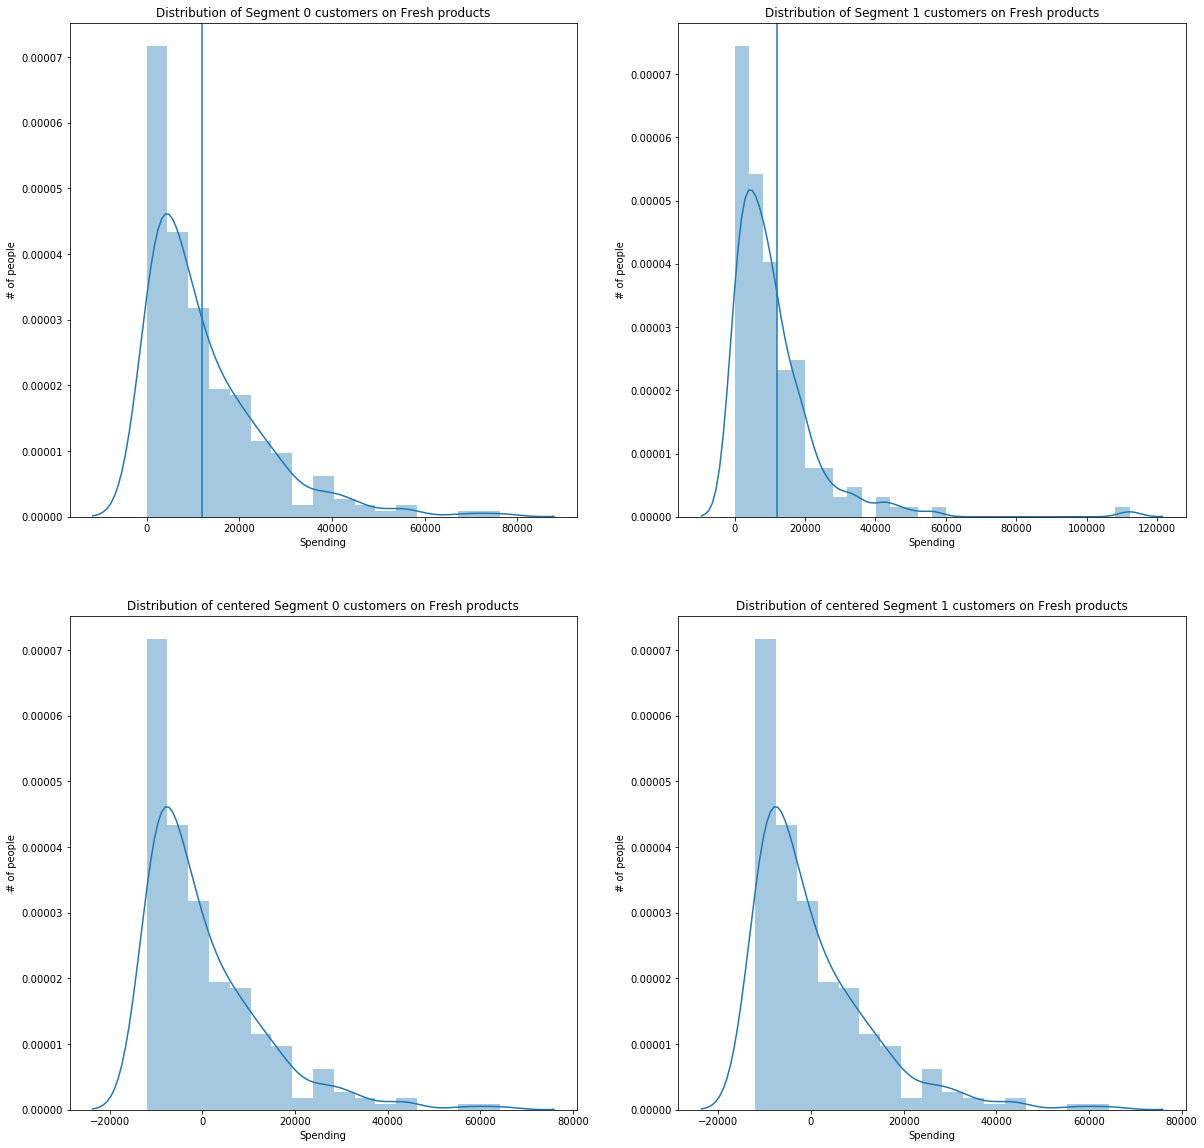

In [50]:
fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(2,2,1)
sns.distplot(segment0_customers['Fresh'])
ax.axvline(x=12000.297)
ax.set_xlabel('Spending')
ax.set_ylabel('# of people')
ax.set_title('Distribution of Segment 0 customers on Fresh products')

ax = fig.add_subplot(2,2,2)
sns.distplot(segment1_customers['Fresh'])
ax.axvline(x=12000.297)
ax.set_xlabel('Spending')
ax.set_ylabel('# of people')
ax.set_title('Distribution of Segment 1 customers on Fresh products')

ax = fig.add_subplot(2,2,3)
sns.distplot(segment0_customers['Fresh']-12000.297)
ax.set_xlabel('Spending')
ax.set_ylabel('# of people')
ax.set_title('Distribution of centered Segment 0 customers on Fresh products')

ax = fig.add_subplot(2,2,4)
sns.distplot(segment0_customers['Fresh'] - 12000.297)
ax.set_xlabel('Spending')
ax.set_ylabel('# of people')
ax.set_title('Distribution of centered Segment 1 customers on Fresh products')




**Answer:** <br>
I think that the frequent delivery service is required for customers which require Fresh products. <br>

**Segment 0:** This segment of customers are more likely to resist the change. It is seen that the average spending on Fresh products by this group is about 9000 while that of total customers is 12000. Therefore, it is quite high. <br>
**Segment 1:** This segment of customers are less likely to resist the change as their average spending is about 5000 which is very low compared to the average 12000 spending of total customers. <br> 

Therefore, by the intuition, we can say that we should run the same old delovery scheme for Segment 0 cusomers while the new scheme can be implemented for Segment 1. Let's strengthen our intuition from below 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**  <br>
Based on the above cluster graph obtained, we saw that the customers wer approximately split on the basis of Dimension 1. The right side of the Dimesnion 1 were Segment 1 while on the left were Segment 0. <br>

We also saw in the visualizations above that Dimension 1 correlates much more with Milk, Grocery and Detergents Paper. <br>

This shows us that the customers are actually split in such a way that the Segment 1 represents customers who have a higher spending on the Milk, Grocery and the Detergents Paper while the Segment 0 represents the vice versa. <br>

This could be the basis of segmenting our customers.
Later, this extra Segmentation Label can also be used during Supervised Learning with an added extra "categorical feature" to maybe predict a type of the establishment!

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

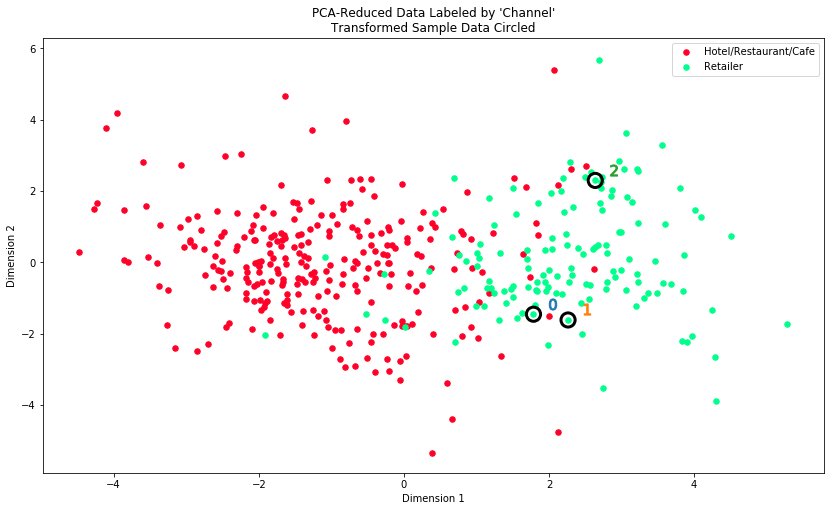

In [51]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** <br>
The distribution of segments found with the Gaussian Mixture Model is quite similar to the above distribution of Hotel/Restaurant/Cafe customers to Retailer customers. We can see that the centroids are very close although the frontier isn't as sharp. This confirms that the GMM was a good choice of algorithm, as the clusters do have a fair amount of overlap in reality. Soft clustering gives us confidence levels in our predictions, which would understandably be low at the boundary between two clusters. <br>
When looking at the data we see that their are parts of the segment that would be classified as purely Retailer for x-values < -3 and as purely Hotels/Restaurants/Cafes for x-values > 2. More complicated shapes could be described to better estimate those areas. <br>
New definition of Segments: <br>
Segment 0: Hotels/restaurants/Cafes <br>
Segment 1: Retailers

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.